In [1]:
pip install nltk

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.1.2 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [30]:
import nltk
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer
from nltk import pos_tag
from nltk.tokenize import word_tokenize
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import roc_curve, auc
import numpy as np
from collections import Counter

In [3]:
nltk.download('punkt')
sentence = "NLTK es una biblioteca de procesamiento de lenguaje natural." 
tokens= word_tokenize(sentence)
print(tokens)


['NLTK', 'es', 'una', 'biblioteca', 'de', 'procesamiento', 'de', 'lenguaje', 'natural', '.']


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\deyvi.caicedo\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [4]:
words = ["running", "plays", "jumped"]
stemmer = PorterStemmer()
stems = [stemmer.stem(word) for word in words] 
print(stems)
nltk.download('averaged_perceptron_tagger')

['run', 'play', 'jump']


[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\deyvi.caicedo\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


True

In [5]:
sentence = "NLTK es una biblioteca de procesamiento de lenguaje natural." 
tokens = word_tokenize(sentence)
tagged_words = pos_tag(tokens)
print(tagged_words)

[('NLTK', 'NNP'), ('es', 'CC'), ('una', 'JJ'), ('biblioteca', 'NN'), ('de', 'IN'), ('procesamiento', 'FW'), ('de', 'FW'), ('lenguaje', 'FW'), ('natural', 'JJ'), ('.', '.')]


In [6]:
# Ejemplo de conjunto de datos de textos etiquetados
data = [
("I love this movie", "positive"),
("This movie is terrible", "negative"),
("This movie is great", "positive"),
("I dislike this movie", "negative"),
("This film is amazing", "positive"),
("I can't stand watching this movie", "negative"), ("The acting in this movie is phenomenal", "positive"), ("I regret wasting my time on this film", "negative"), ("I thoroughly enjoyed this movie", "positive"), ("This movie lacks depth and substance", "negative"),
("The plot of this movie was captivating", "positive"),
("I found the characters in this film to be very engaging", "positive"),
("The special effects in this movie were impressive", "positive"),
("The storyline was predictable and unoriginal", "negative"),
("I was disappointed by the lack of character development", "negative"),
("The cinematography in this film was stunning", "positive"),
("The dialogue felt forced and unnatural", "negative"),
("The pacing of the movie was too slow for my liking", "negative"),
("I was pleasantly surprised by how much I enjoyed this film", "positive"),
("The ending left me feeling unsatisfied and confused", "negative"),
("This movie exceeded my expectations", "positive"),
("The performances by the actors were lackluster", "negative")

]

In [7]:
# Preprocesamiento de datos: tokenización y extracción de características 
def preprocess (text):
   tokens = nltk.word_tokenize(text)
   return {word: True for word in tokens}

In [8]:
# Aplicamos el preprocesamiento a los datos
featuresets = [(preprocess(text), label) for (text, label) in data]

In [9]:
# Dividimos los datos en conjuntos de entrenamiento y prueba 
train_set, test_set = featuresets[:16], featuresets[16:] 

In [10]:
 # Entrenamos un clasificador utilizando Naive Bayes 
classifier = nltk.NaiveBayesClassifier.train (train_set)

In [11]:
# Evaluamos el clasificador en el conjunto de prueba
#test_texts = [text for (features, label) in test_set]
test_labels = [label for (features, label) in test_set]
test_features = [features for (features, label) in test_set]
predicted_labels = [classifier.classify(features) for features in test_features]

accuracy = nltk.classify.accuracy(classifier, test_set) 
print("Accuracy:", accuracy)

Accuracy: 0.6666666666666666


In [12]:
# Mostrar el informe de clasificación y la matriz de confusión
print("\nClassification Report:")
print(classification_report(test_labels, predicted_labels))


Classification Report:
              precision    recall  f1-score   support

    negative       0.75      0.75      0.75         4
    positive       0.50      0.50      0.50         2

    accuracy                           0.67         6
   macro avg       0.62      0.62      0.62         6
weighted avg       0.67      0.67      0.67         6



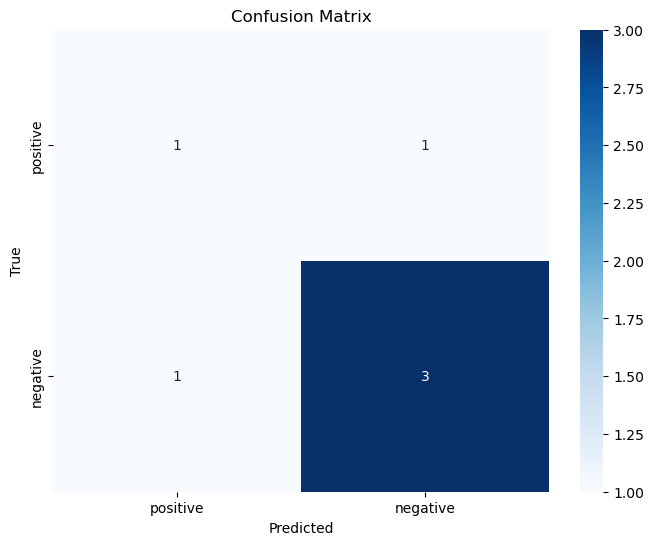

In [13]:
cm = confusion_matrix(test_labels, predicted_labels, labels=["positive", "negative"])
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=["positive", "negative"], yticklabels=["positive", "negative"])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

In [14]:
# Clasificamos un nuevo texto
new_text = "This movie is amazing"

new_text_features = preprocess(new_text)
predicted_label = classifier.classify(new_text_features)

print("Predicted label for new text:", predicted_label)

Predicted label for new text: positive


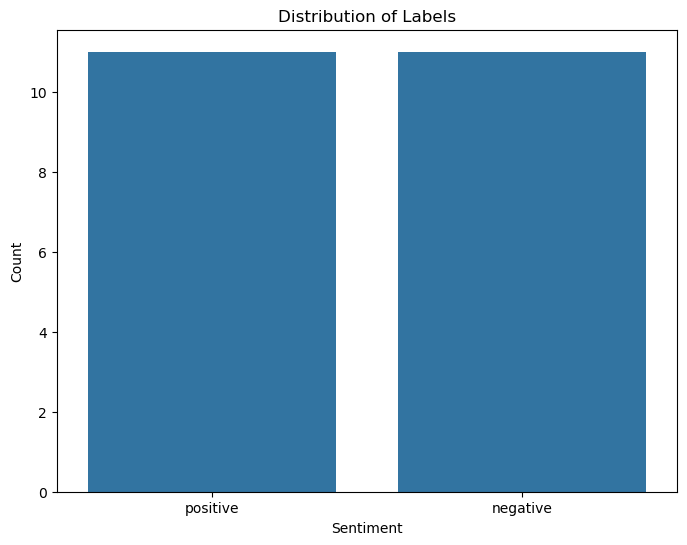

In [15]:
# Graficar la distribución de etiquetas en el conjunto de datos
labels = [label for (text, label) in data]
plt.figure(figsize=(8, 6))
sns.countplot(x=labels)
plt.title('Distribution of Labels')
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.show()

In [17]:
# Evaluamos el clasificador en el conjunto de prueba
test_features, test_labels = zip(*test_set)
test_predictions = [classifier.classify(features) for features in test_features]

In [18]:
# Convertimos las etiquetas a valores binarios
binary_labels = [1 if label == "positive" else 0 for label in test_labels]
binary_predictions = [1 if pred == "positive" else 0 for pred in test_predictions]

In [21]:
# Calculamos la curva ROC
fpr, tpr, thresholds = roc_curve(binary_labels, binary_predictions)
roc_auc = auc(fpr, tpr)

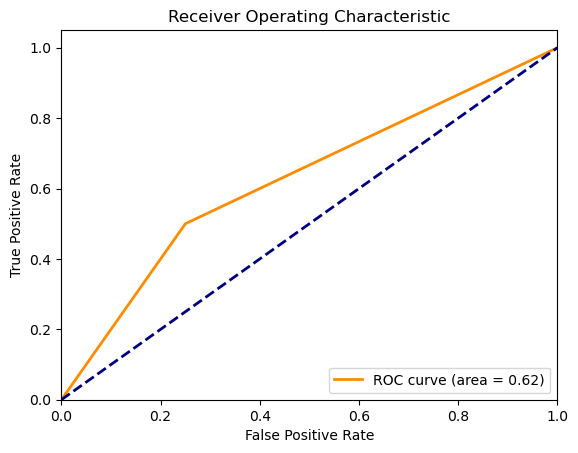

In [22]:
# Trazamos la curva ROC
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc='lower right')
plt.show()

In [32]:
# Calculamos los errores
errors = [1 if binary_labels[i] != binary_predictions[i] else 0 for i in range(len(binary_labels))]

In [33]:
# Contamos el número de errores
error_counts = Counter(errors)

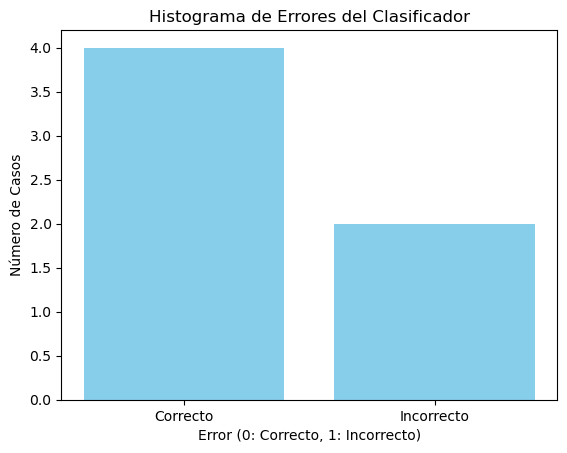

In [34]:
# Trazamos el histograma de errores
plt.figure()
plt.bar(error_counts.keys(), error_counts.values(), color='skyblue')
plt.xlabel('Error (0: Correcto, 1: Incorrecto)')
plt.ylabel('Número de Casos')
plt.title('Histograma de Errores del Clasificador')
plt.xticks([0, 1], ['Correcto', 'Incorrecto'])
plt.show()